In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import scipy.stats as stats

from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', 100)


In [6]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.columns


Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [7]:
df.value_counts().sum()

319795

In [8]:
# df.shape


In [9]:
df.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [10]:
# df.info()


In [11]:
# df.describe()


In [12]:
# df.isnull().sum()


In [13]:
# df.AgeCategory.value_counts()


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

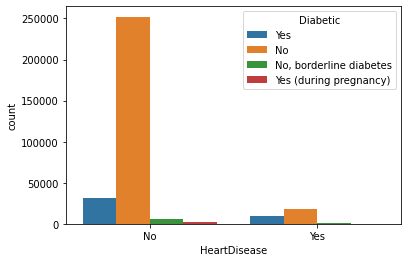

In [14]:
# x=df.HeartDisease
# y=df.Diabetic
sns.countplot(x=df.HeartDisease, hue=df.Diabetic)


# Feature Engineering

####  I Converting the AgeCategory column into medium value

In [15]:
res = [sub.replace('80 or older', '80-100') for sub in df.AgeCategory]

first_part = []
second_part = []
for ele in res:
    first_part.append(ele.split("-")[0])
    second_part.append(ele.split("-")[1])

f1_age = list(map(int, first_part))
f2_age = list(map(int, second_part))

median = []
for i in range(len(f1_age)):
    l = (f1_age[i]+f2_age[i])/2
    median.append(l)

median = list(map(int, median))

df["Age"] = median
df.drop('AgeCategory', axis=1, inplace=True)

df.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Age
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,White,Yes,Yes,Very good,5.0,Yes,No,Yes,57
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,White,No,Yes,Very good,7.0,No,No,No,90
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,White,Yes,Yes,Fair,8.0,Yes,No,No,67
3,No,24.21,No,No,No,0.0,0.0,No,Female,White,No,No,Good,6.0,No,No,Yes,77
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,White,No,Yes,Very good,8.0,No,No,No,42


## 1 Prepairing the data for chi squar testing

Splited the data into two parts "Numarical" and "Categorical" so we can perform encoding on all the categorical features

In [16]:

num = df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'Age']]
cat = df.drop(num, axis=1)


### Label Encoding on all the colummn 

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

categ = cat.columns
cat[categ] = cat[categ].apply(le.fit_transform)


Dropped the 'Race' feature because it was useless and we dropped the 'Diabetic' and 'GenHealth' to perform loabel encoding sapratly on these two because these feature have ordinal type of value 

In [18]:
# cat.drop(['Diabetic', 'Race', 'GenHealth'], axis=1, inplace=True)


Label Encoding on 'GenHealth'

In [19]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# from sklearn import datasets
# GenHealth = df.GenHealth

# levle_data = {"Excellent": 4, "Very good": 3, "Good": 2, "Fair": 1, "Poor": 0}


# def label_encoding(data, levle_data):
#     k = []
#     # df["level_diagnosis"]+k
#     for x in range(len(data)):
#         str_data = levle_data[data[x]]
#         k.append(str_data)
#     return k


# GenHealth = label_encoding(GenHealth, levle_data)

# cat["GenHealth"] = GenHealth


Label Encoding on 'Diabetic'

In [20]:
# Diabetic = df.Diabetic

# levle_data = {"Yes": 3, "Yes (during pregnancy)": 2,
#               "No, borderline diabetes": 1, "No": 0}


# def level_encoding(data, levle_data):
#     k = []
#     # df["level_diagnosis"]+k
#     for x in range(len(data)):
#         str_data = levle_data[data[x]]
#         k.append(str_data)
#     return k


# Diabetic = level_encoding(Diabetic, levle_data)

# cat["Diabetic"] = Diabetic


Merging the num and cat 

In [21]:
result = pd.concat([num, cat], axis=1, join='inner')
result.drop(['SleepTime', 'Race'], axis=1, inplace=True)

chi square testing

In [22]:
x = result.iloc[:, 0:].drop(['HeartDisease'], axis=1)
y = result.HeartDisease

# k = 4 tells four top features to be selected
# Score function Chi2 tells the feature to be selected using Chi Square
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x, y)
# fit.scores_

column = x.columns
for i in range(len(fit.scores_)):
    print(fit.scores_[i], "  ==  ", column[i])



1224.0207257225218   ==   BMI
174751.52992377843   ==   PhysicalHealth
4243.691008175619   ==   MentalHealth
116552.66182378223   ==   Age
2181.9530231031317   ==   Smoking
306.69327027017357   ==   AlcoholDrinking
11922.577647178325   ==   Stroke
11154.414930638695   ==   DiffWalking
823.1956712923966   ==   Sex
15526.406398793944   ==   Diabetic
718.810142010766   ==   PhysicalActivity
41.49672720503409   ==   GenHealth
475.64783537825235   ==   Asthma
6493.654142687115   ==   KidneyDisease
2525.122509296585   ==   SkinCancer


In [23]:
df.drop(['Race', 'SleepTime'], axis=1, inplace=True)

## Modal building

In [24]:
x = result.iloc[:, 0:].drop(['HeartDisease'], axis=1)
y = result.HeartDisease

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [36]:
x_test.head()

,BMI,PhysicalHealth,MentalHealth,Age,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
65184,29.03,0.0,3.0,37,1,1,0,0,1,1,1,2,0,0,0
123086,25.10,0.0,3.0,42,0,0,0,0,0,0,1,4,0,0,0
15569,36.78,2.0,0.0,62,0,0,0,0,0,0,1,2,0,0,0
237617,25.75,30.0,15.0,77,0,0,0,0,0,0,1,4,0,0,0
276124,25.11,0.0,0.0,67,0,0,0,0,1,0,1,4,0,0,0


In [25]:
x_test.shape

(63959, 15)

In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [27]:
# Model prediction on train data
pred_train = model.predict(x_train)

In [28]:
# Model Evaluation on training data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Summary of the predictions made by the classifier
print(classification_report(y_train,pred_train))
print(confusion_matrix(y_train,pred_train))

# Accuracy score
print('Accuracy Score of Model on train data is: {}' .format(accuracy_score(y_train,pred_train)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    233868
           1       1.00      0.91      0.95     21968

    accuracy                           0.99    255836
   macro avg       0.99      0.95      0.97    255836
weighted avg       0.99      0.99      0.99    255836

[[233815     53]
 [  2049  19919]]
Accuracy Score of Model on train data is: 0.9917837989962319


In [29]:
# profile = pp.ProfileReport(result)
# profile.to_file("output.html")

In [30]:

rf = RandomForestClassifier()

In [31]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

In [32]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [33]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = RandomizedSearchCV(estimator = rf, 
                       param_distributions = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [34]:
rf_grid.fit(x_train,y_train)

In [35]:
rf_grid.best_params_

NameError: name 'rf_grid' is not defined

In [ ]:
rf_grid.best_score_

0.9155904559226185

In [ ]:
rf_predict = rf_grid.predict(x_test)

In [ ]:
(rf_predict == y_test).mean()

0.9157741678262638

In [ ]:
lst = []
for i in range(len(x_test)):
    lst.append(i)
    

In [ ]:
ytst = y_test

In [ ]:
ytst["index"] = lst

In [ ]:
ytst.index

Index([ 238524,  102842,  134119,  211452,   68000,  265322,   11580,  311765,
        194791,  284116,
       ...
        195945,  116786,  189363,  311884,  292183,  135022,   55308,   54788,
        108348, 'index'],
      dtype='object', length=63960)

In [ ]:
rf_grid.predict(x_test.iloc[[9392]])

array([0])

In [ ]:
y_test.iloc[[6943]]

69792    0
Name: HeartDisease, dtype: object

In [ ]:
x_test.iloc[[6943]]

,BMI,PhysicalHealth,MentalHealth,Age,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
69792,28.25,2.0,0.0,42,1,0,0,0,0,0,1,4,0,0,0


In [ ]:
y_test["index"]=lst

In [ ]:
y_test

179392                                                    0
238574                                                    0
250496                                                    0
306948                                                    0
172063                                                    0
                                ...                        
46211                                                     0
248180                                                    0
134843                                                    0
100489                                                    0
index     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
Name: HeartDisease, Length: 63960, dtype: object